<a href="https://colab.research.google.com/github/Danil1D/Machine-learning/blob/main/%D0%94%D0%B0%D1%88%D0%BA%D0%B5%D0%B2%D0%B8%D1%87_%D0%BB%D0%B0%D0%B1%E2%84%965(%D0%B7%D0%B0%D0%B2%D0%B4_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Завдання №1
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


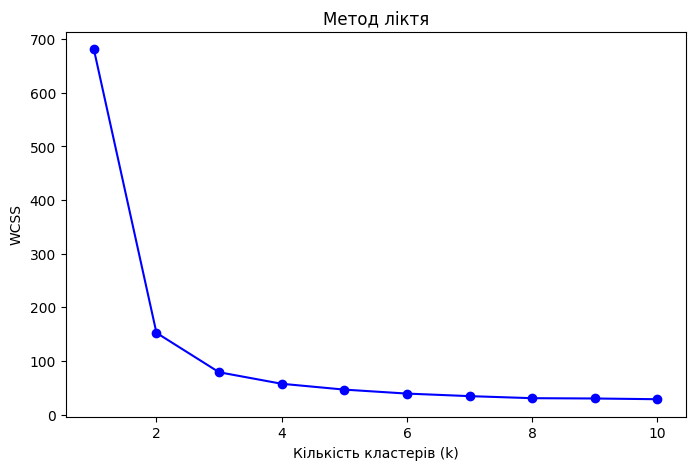

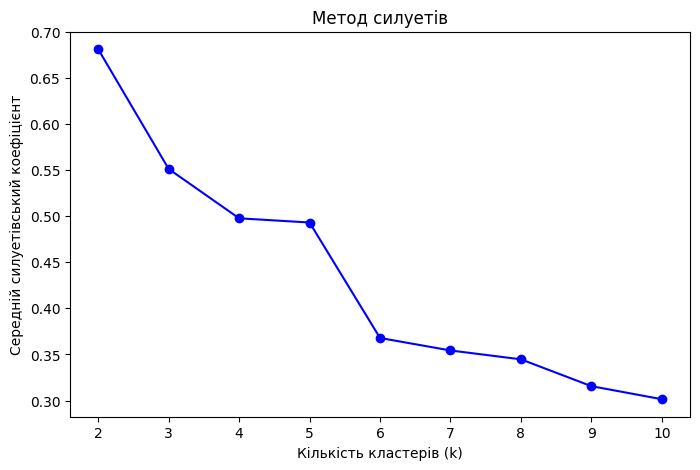

In [2]:
#Завдання №2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = iris.drop('species', axis=1)

wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('WCSS')
plt.title('Метод ліктя')
plt.show()

silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Середній силуетівський коефіцієнт')
plt.title('Метод силуетів')
plt.show()


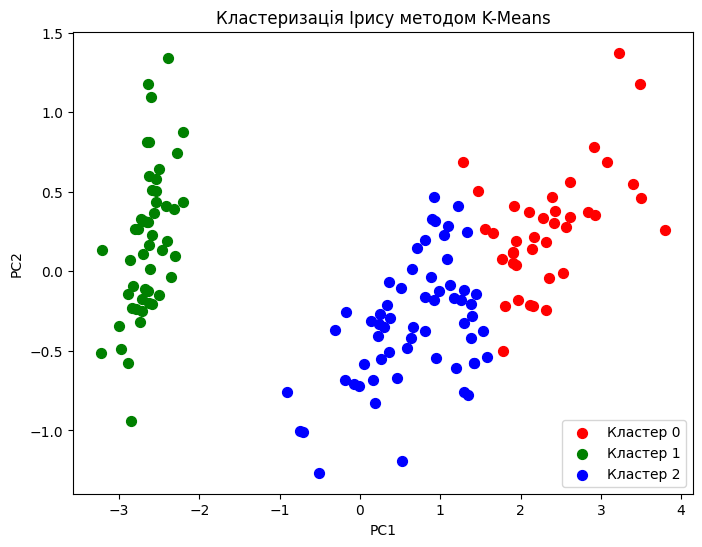

In [3]:
#Завдання №3
from sklearn.decomposition import PCA

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
iris['cluster'] = kmeans.fit_predict(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
iris['pc1'] = principal_components[:, 0]
iris['pc2'] = principal_components[:, 1]

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(optimal_k):
    plt.scatter(
        iris.loc[iris['cluster'] == i, 'pc1'],
        iris.loc[iris['cluster'] == i, 'pc2'],
        s=50,
        c=colors[i],
        label=f'Кластер {i}'
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Кластеризація Ірису методом K-Means')
plt.legend()
plt.show()


Висновки.

Метод ліктя показав, що оптимальна кількість кластерів становить 3, оскільки після цього спостерігається зниження WCSS без значного поліпшення.

Метод силуетів також підтвердив оптимальну кількість кластерів як 3, маючи найвищий середній силуетівський коефіцієнт.

Візуалізація кластерів демонструє чітке розділення між трьома кластерами, що відповідає трьом видам ірисів у датасеті (setosa, versicolor, virginica).